In [2]:
import pandas as pd
import numpy as np
import glob
import imageio
import matplotlib.pyplot as plt
import sklearn

In [3]:
# project_path = "/content/drive/My Drive/Hardware Project" if the database is from google drive, need to add the respected libraries
project_path = "./"

## Peek dataset

C:\Users\a1sew\AppData\Local\Temp\ipykernel_16060\1953938947.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(pic)


picture shape: (256, 4096)
picture matrix: 
 [[255 255 255 ...  85  82  81]
 [255 255 255 ...  97  90  78]
 [255 255 255 ... 109 103  91]
 ...
 [255 255 255 ...  76  85  96]
 [255 255 255 ...  73  71  65]
 [255 255 255 ... 103 100  94]]


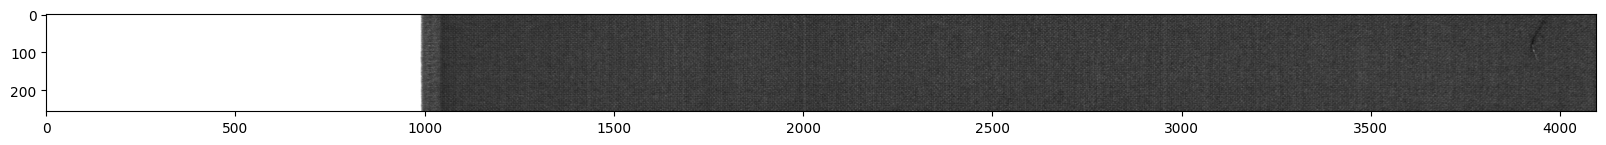

In [4]:
# load a picture
pic = project_path + "/dataset/Defect_images/0003_002_00.png"
im = imageio.imread(pic)
print("picture shape: {}".format(im.shape))
print("picture matrix: \n {}".format(im))
# set display size
plt.figure(figsize=(20,10))
plt.imshow(im, cmap='gray')
plt.show()

## Load dataset

In [5]:
def load_file(file_path, label):
    
    """
    TODO: load the file then create the dict object and append to list
    Return: numpyarray
    Description: object {
                  "name" : file name
                  "label" : label
                  "data" : image
                  }
    """

    # declare the folder name
    folder_name = file_path.split("/")[-1]
    # declare output list
    out_list = []
    # load every file that .png format
    for image_path in glob.glob(file_path + "/*.png"):
        # read image file
        image = imageio.imread(image_path)
        # declare temporary dict dtype
        temp = {}
        # set the file name
        temp["name"] = image_path.split("/")[-1]
        # set the file label, 0 for non defect. 1 for defect
        temp["label"] = label

        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:   
            temp["data"] = image[:,:,0].astype("int") 
        except:
            # normal case
            temp["data"] = image.astype("int")
        # append temp into output list
        out_list.append(temp)
    # print process status by checking size of output list
    if len(out_list) == 0:
        print("loading files from folder: {} is failed".format(folder_name))
    else:
        print("loading file from folder: {} is successful".format(folder_name))
    # convert list into numpy array dtype
    return np.array(out_list)

### Prepare file paths

In [6]:
defect_images_path = project_path + "/dataset/Defect_images"
non_defect_images_path1 =  project_path + "/dataset/NoDefect_images/2306881-210020u"
non_defect_images_path2 =  project_path + "/dataset/NoDefect_images/2306894-210033u"
non_defect_images_path3 =  project_path + "/dataset/NoDefect_images/2311517-195063u"
non_defect_images_path4 =  project_path + "/dataset/NoDefect_images/2311694-1930c7u"
non_defect_images_path5 =  project_path + "/dataset/NoDefect_images/2311694-2040n7u"
non_defect_images_path6 =  project_path + "/dataset/NoDefect_images/2311980-185026u"
non_defect_images_path7 =  project_path + "/dataset/NoDefect_images/2608691-202020u"
mask_images_path =  project_path + "/dataset/Mask_images"

### Load files

In [7]:
defect_images = load_file(file_path=defect_images_path, label=1)
non_defect_images1 = load_file(file_path=non_defect_images_path1, label=0)
non_defect_images2 = load_file(file_path=non_defect_images_path2, label=0)
non_defect_images3 = load_file(file_path=non_defect_images_path3, label=0)
non_defect_images4 = load_file(file_path=non_defect_images_path4, label=0)
non_defect_images5 = load_file(file_path=non_defect_images_path5, label=0)
non_defect_images6 = load_file(file_path=non_defect_images_path6, label=0)
non_defect_images7 = load_file(file_path=non_defect_images_path7, label=0)
mask_images = load_file(file_path=mask_images_path, label=-1)

C:\Users\a1sew\AppData\Local\Temp\ipykernel_16060\2795272823.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(image_path)


loading file from folder: Defect_images is successful
loading file from folder: 2306881-210020u is successful
loading file from folder: 2306894-210033u is successful
loading file from folder: 2311517-195063u is successful
loading file from folder: 2311694-1930c7u is successful
loading file from folder: 2311694-2040n7u is successful
loading file from folder: 2311980-185026u is successful
loading file from folder: 2608691-202020u is successful
loading file from folder: Mask_images is successful


In [8]:
# contribute the non defect dataset into one file
non_defect_images = np.concatenate((non_defect_images1, non_defect_images2))
non_defect_images = np.concatenate((non_defect_images, non_defect_images3))
non_defect_images = np.concatenate((non_defect_images, non_defect_images4))
non_defect_images = np.concatenate((non_defect_images, non_defect_images5))
non_defect_images = np.concatenate((non_defect_images, non_defect_images6))
non_defect_images = np.concatenate((non_defect_images, non_defect_images7))

In [9]:
print("defect_images.shape: {}\nnon_defect_images.shape: {}\nmask_images.shape:{} \n".format(defect_images.shape, non_defect_images.shape, mask_images.shape))

defect_images.shape: (105,)
non_defect_images.shape: (141,)
mask_images.shape:(107,) 



## Data preparation

In [10]:
# we shuffle the order of defect-free and defect images
np.random.shuffle(non_defect_images)
np.random.shuffle(defect_images)
# the class size is the min length compared with defect-free and defect images
class_size = defect_images.shape[0] if defect_images.shape[0] <= non_defect_images.shape[0] else non_defect_images.shape[0]
# declare dataset by concat defect_images and non_defect_images with length 0 to class_size
dataset = np.concatenate((defect_images[:class_size], non_defect_images[:class_size]))
# create an empty matrix X with is matrix of 256x4096 and has dataset length row
X = np.empty([dataset.shape[0], 256, 4096]).astype(int)
# create vector y which has dataset length
y = np.empty(dataset.shape[0]).astype(int)
# assign the X,y one-by-one
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]
# since Keras acquire the Image input is a tensor type -> we reshape X
X = X.reshape(X.shape[0], 256, 4096, 1)
# display size of the label 0 and label 1 
np.unique(y, return_counts=True)

(array([0, 1]), array([105, 105], dtype=int64))

## Create CNN model

In [11]:
from tensorflow.keras import datasets, layers, models, optimizers, regularizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
def create_model(image_shape=(256, 4096, 1), print_summary=False):
    # initial model
    model = models.Sequential()

    # CONV layer: filter 16, stride 7x7
    model.add(layers.Conv2D(16, (7, 7),input_shape=image_shape))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    model.add(layers.Conv2D(32, (5, 5), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    model.add(layers.Conv2D(64, (3, 3), padding="same"))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # max pooling -> reduce image size
    model.add(layers.MaxPooling2D((2, 2)))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    # flatten later -> from matrix to vector
    model.add(layers.Flatten())
    
    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))

    # fully connected layer -> nn layer with 64 nodes
    model.add(layers.Dense(64))
    # Batch Normalization layer -> avoid overfitting
    model.add(layers.BatchNormalization())
    # activation layer 
    model.add(layers.Activation('relu'))
    # droput later -> avoid overfitting
    model.add(layers.Dropout(0.25))
    
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # set model compiler
    model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
    
    # show the CNN model detail
    if print_summary:
        model.summary()
    return model

def train_model(model, xtrain, ytrain, xval, yval, n_epoch, batch_size):
    # train CNN model
    # batch size to reduce memory usage
    # set early stopping to avoid overfitting
    
    earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)
    filepath = project_path + "/model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
    
    checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint, earlystopping]

    history = model.fit(xtrain, ytrain, epochs=n_epoch, batch_size=batch_size, validation_data=(xval, yval), callbacks=[callbacks_list])
    return history

create_model(image_shape=(256, 4096, 1), print_summary=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 4090, 16)     800       
                                                                 
 batch_normalization (BatchN  (None, 250, 4090, 16)    64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 250, 4090, 16)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 2045, 16)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 125, 2045, 16)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 2045, 32)     1

## Evaluate CNN model

In [13]:
from sklearn.model_selection import StratifiedKFold

In [14]:
# set number of split
kfold_splits = 4
# set number of epoch
n_epoch = 10
# set batch size
batch_size = 10

# create StratifiedKFold
skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True)
for index, (train_indices, val_indices) in enumerate(skf.split(X, y)):
    print("Training on fold {}/{}...".format(index+1, kfold_splits))

    # declare x train and x validate
    xtrain, xval = X[train_indices], X[val_indices]
    # declare y train and y validate
    ytrain, yval = y[train_indices], y[val_indices]

    # print number of class portion
    print("ytrain: number of samples each class: {}".format(np.unique(ytrain, return_counts=True)))
    print("yval: number of samples each class: {}".format(np.unique(yval, return_counts=True)))

    # clear the model
    model = None
    # create cnn model  
    model = create_model()

    print("Training new iteration on {} training samples, {} validation samples, this may be a while...".format(xtrain.shape[0], xval.shape[0]))
    
    # train CNN model
    history = train_model(model, xtrain, ytrain, xval, yval, n_epoch, batch_size)

    print("--------------------------------------------------------------------")

Training on fold 1/4...
ytrain: number of samples each class: (array([0, 1]), array([79, 78], dtype=int64))
yval: number of samples each class: (array([0, 1]), array([26, 27], dtype=int64))
Training new iteration on 157 training samples, 53 validation samples, this may be a while...
Epoch 1/10
16/16 [==============================] - ETA: 0s - loss: 0.7414 - accuracy: 0.5287
Epoch 1: val_accuracy improved from -inf to 0.56604, saving model to .//model\weights-improvement-01-0.57.hdf5
16/16 [==============================] - 145s 9s/step - loss: 0.7414 - accuracy: 0.5287 - val_loss: 0.9482 - val_accuracy: 0.5660
Epoch 2/10
16/16 [==============================] - ETA: 0s - loss: 0.6432 - accuracy: 0.6242
Epoch 2: val_accuracy did not improve from 0.56604
16/16 [==============================] - 142s 9s/step - loss: 0.6432 - accuracy: 0.6242 - val_loss: 1.3172 - val_accuracy: 0.5094
Epoch 3/10
16/16 [==============================] - ETA: 0s - loss: 0.6783 - accuracy: 0.6306
Epoch 3: val

## Train and Export CNN Model

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
print("y_train: number of samples each class: {}".format(np.unique(y_train, return_counts=True)))
print("y_test: number of samples each class: {}".format(np.unique(y_test, return_counts=True)))

y_train: number of samples each class: (array([0, 1]), array([87, 91], dtype=int64))
y_test: number of samples each class: (array([0, 1]), array([18, 14], dtype=int64))


In [17]:
cnn_model = None
cnn_model = create_model(image_shape=(256, 4096, 1))

In [18]:
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2)
filepath = project_path + "/model/weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint, earlystopping]

In [19]:
cnn_model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/10
15/15 [==============================] - ETA: 0s - loss: 0.7822 - accuracy: 0.5000 
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to .//model\weights_best.hdf5
15/15 [==============================] - 171s 11s/step - loss: 0.7822 - accuracy: 0.5000 - val_loss: 1.4988 - val_accuracy: 0.5000
Epoch 2/10
15/15 [==============================] - ETA: 0s - loss: 0.6563 - accuracy: 0.5845
Epoch 2: val_accuracy did not improve from 0.50000
15/15 [==============================] - 148s 10s/step - loss: 0.6563 - accuracy: 0.5845 - val_loss: 0.7705 - val_accuracy: 0.5000
Epoch 3/10
15/15 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.6127 
Epoch 3: val_accuracy improved from 0.50000 to 0.58333, saving model to .//model\weights_best.hdf5
15/15 [==============================] - 152s 10s/step - loss: 0.6498 - accuracy: 0.6127 - val_loss: 0.6640 - val_accuracy: 0.5833
Epoch 4/10
15/15 [==============================] - ETA: 0s - loss: 0.6415 - 

## Load model

In [20]:
cnn_model1 = create_model()
cnn_model1.load_weights(project_path + "/model/weights_best.hdf5")
score, acc = cnn_model1.evaluate(X_test, y_test, verbose=0)
score, acc
print(f"{score}, {acc}")

0.6177542209625244, 0.65625
